### Минимизация гладкой функции

Рассмотрим функцию: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)\
на промежутке [1, 30]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

%matplotlib inline

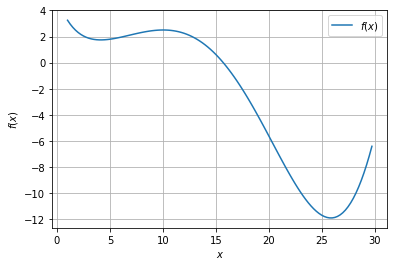

In [2]:
f = lambda x: np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)

x = np.arange(1.0, 30.0, 0.25) # Массив значений аргумента
plt.plot(x, f(x)) # Построение графика
plt.xlabel('$x$') # Метка по оси x в формате TeX
plt.ylabel('$f(x)$') # Метка по оси y в формате TeX
plt.grid(True) # Сетка
plt.legend(( '$f(x)$', ))
plt.show() # Показать график

Попробуем найти минимум, используя стандартные параметры в функции scipy.optimize.minimize\
Будем менять начальное приближение и наблюдать как меняется результат

In [10]:
x0 = np.random.choice(range(1, 31))
print("Начальное приближение x0 =", x0)
scipy.optimize.minimize(f, x0=x0) # Минимизация скалярной функции одной или нескольких переменных

Начальное приближение x0 = 4


      fun: 1.7452682904152543
 hess_inv: array([[5.93456151]])
      jac: array([-5.24520874e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([4.13625698])

Укажите в scipy.optimize.minimize в качестве метода BFGS\
BFGS (Алгоритм Бройдена-Флетчера-Голдфарба-Шанно) - один из градиентных методов оптимизации\
BFGS использует градиент целевой ф-и (Целевая функция - функция нескольких переменных, подлежащая оптимизации)\
Начального приближения x=2

In [11]:
answer1 = scipy.optimize.minimize(f, x0=2, method='BFGS')
answer1

      fun: 1.745268290344928
 hess_inv: array([[5.98750711]])
      jac: array([-2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627619])

Начального приближения x=30

In [12]:
answer2 = scipy.optimize.minimize(f, x0=30, method='BFGS')
answer2

      fun: -11.898894665981322
 hess_inv: array([[1.67940841]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.880193])

ВЫВОД - градиентные методы обычно не решают задачу глобальной оптимизации

### Глобальная оптимизация
Глобальная оптимизация - поиск глобальных экстремумов

Применим к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию - \
метод многомерной математической оптимизации, относящийся к классу стохастических (с использованием случайных чисел)

In [14]:
answer = scipy.optimize.differential_evolution(f, bounds=[(1, 30)]) # Скобки [] !
answer

     fun: array([-11.89889467])
     jac: array([2.13162821e-06])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([25.88019638])

nit - кол - во итераций .  nfev - кол -во вычислений ф-и

ВЫВОД - Дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке

### Минимизация негладкой функции

Рассмотрим функцию h(x) = int(f(x)) на том же отрезке *[1, 30]\
Теперь каждое значение *f(x) приводится к типу int и функция принимает только целые значения.

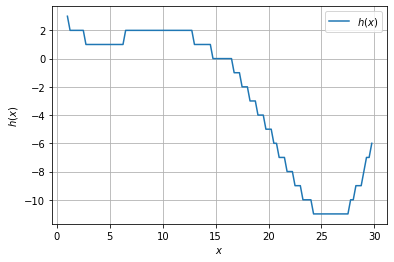

In [17]:
h = lambda x: int(f(x))

plt.plot(x, list(map(h, x))) # Построение графика
plt.xlabel('$x$') # Метка по оси x в формате TeX
plt.ylabel('$h(x)$') # Метка по оси y в формате TeX
plt.grid(True) # Сетка
plt.legend(( '$h(x)$', ))
plt.show() # Показать график

In [18]:
answer2 = scipy.optimize.differential_evolution(h, bounds=[(1, 30)])
answer2

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 107
     nit: 6
 success: True
       x: array([26.6993486])

Так как наша функция негладкая и даже разрывная градиентные методы использовать нельзя